In [1]:
#Forma parte del pre procesamiento de datos

In [2]:
# Los outliers son datos muy diferente al resto. En algunos casos se buscan sacarlos para hacer un mejor analisis.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
rios = pd.read_csv("../arch/Rios.csv", engine="python", index_col=0)
rios.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141 entries, 1 to 141
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Millas  141 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [5]:
rios

,Millas
Rio,
1,735
2,320
3,325
4,392
5,524
...,...
137,720
138,270
139,430


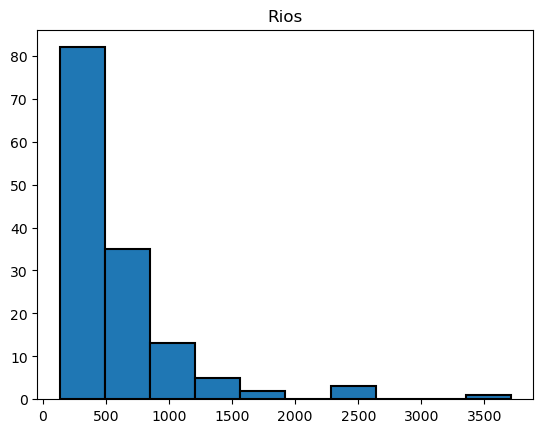

In [6]:
# Creamos un histograma para ver la distribución de los valores
plt.title("Rios")
plt.hist(rios["Millas"], edgecolor="black", linewidth=1.5)
plt.show() #.show() evita que se despliegue el resultado en forma de texto
 

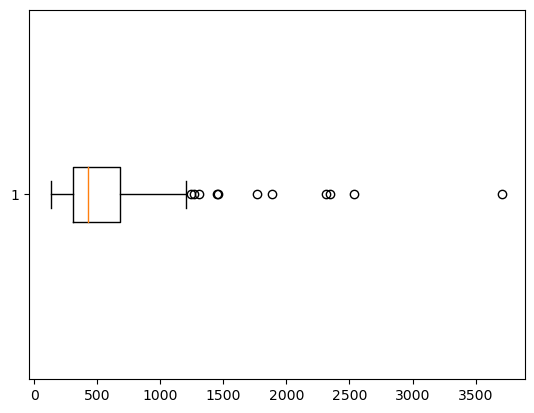

In [7]:
plt.boxplot(rios["Millas"], vert=False)
plt.show()
#El primer cuartil es igual al extremo izquierdo de la caja 
#El tercer cuartil es igual al extremo derecho de la caja 
#La mediana es la linea amarilla de adentro de la caja


In [8]:
Q1 = rios["Millas"].quantile(0.25)
print("Primer Cuartil",Q1)

Q3 = rios["Millas"].quantile(0.75)
print("Tercer Cuartil",Q3)

IQR  = Q3 - Q1
print("Rango Intercuartil", IQR)

Mediana = rios["Millas"].median()
print("Mediana", Mediana)

valor_minimo = rios["Millas"].min()
print("Valor minimo",valor_minimo)

valor_maximo = rios["Millas"].max()
print("Valor maximo",valor_maximo)

Primer Cuartil 310.0
Tercer Cuartil 680.0
Rango Intercuartil 370.0
Mediana 425.0
Valor minimo 135
Valor maximo 3710


In [9]:
#Calculo de los bigotes. BI= bigote inferior. BS=bigote superior
BI_Calculado = (Q1-1.5*IQR)
print("BI_Calculado",BI_Calculado)

BS_Calculado = (Q3+1.5*IQR)
print("BSCalculado",BS_Calculado)


BI_Calculado -245.0
BSCalculado 1235.0


In [10]:
#como detectar los outliers
ubicacion_outliers = (rios["Millas"] < BI_Calculado) | (rios["Millas"] > BS_Calculado)
print("Ubicación de Outliers ", ubicacion_outliers)

Ubicación de Outliers  Rio
1      False
2      False
3      False
4      False
5      False
       ...  
137    False
138    False
139    False
140    False
141     True
Name: Millas, Length: 141, dtype: bool


In [11]:
outliers = rios[ubicacion_outliers]
print("Lista de Outliers", outliers)

Lista de Outliers      Millas
Rio        
7      1459
23     1450
25     1243
66     2348
68     3710
69     2315
70     2533
83     1306
98     1270
101    1885
141    1770


In [12]:
outliers_ordenados = outliers.sort_values("Millas")
outliers_ordenados

,Millas
Rio,
25,1243
98,1270
83,1306
23,1450
7,1459
141,1770
101,1885
69,2315
66,2348


In [13]:
#Valores que no son outliers
ubicacion_sin_out = (rios["Millas"] >= BI_Calculado) & (rios["Millas"] <= BS_Calculado)
sin_outliers = rios[ubicacion_sin_out]
sin_outliers

,Millas
Rio,
1,735
2,320
3,325
4,392
5,524
...,...
136,500
137,720
138,270


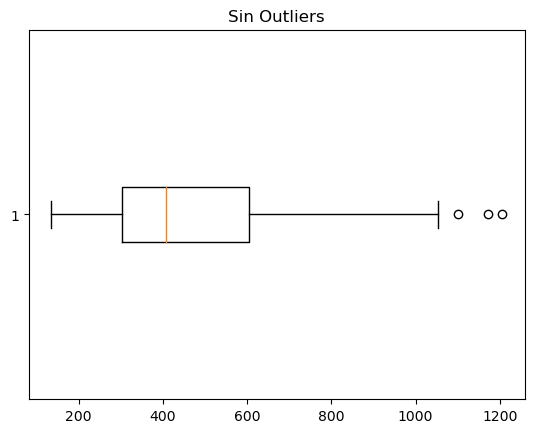

In [14]:
#Hago un grafico de caja y bigotes para ver si "sin outliers" tiene más outliers
plt.title("Sin Outliers")
plt.boxplot(sin_outliers["Millas"],vert=False)
plt.show()
#Al ver el grafico podemos ver que hay más outliers
#Se puede seguir haciendo el proceso hasta que noShayan mas outliers